## 分类数据的统计分析：逻辑斯蒂回归

##### （黄荣贵）复旦大学社会学系

#### logit变化

变换的公式为：$logit(p) = \frac{p}{1-p}$

In [1]:
linkfun = binomial()$linkfun
linkinv = binomial()$linkinv

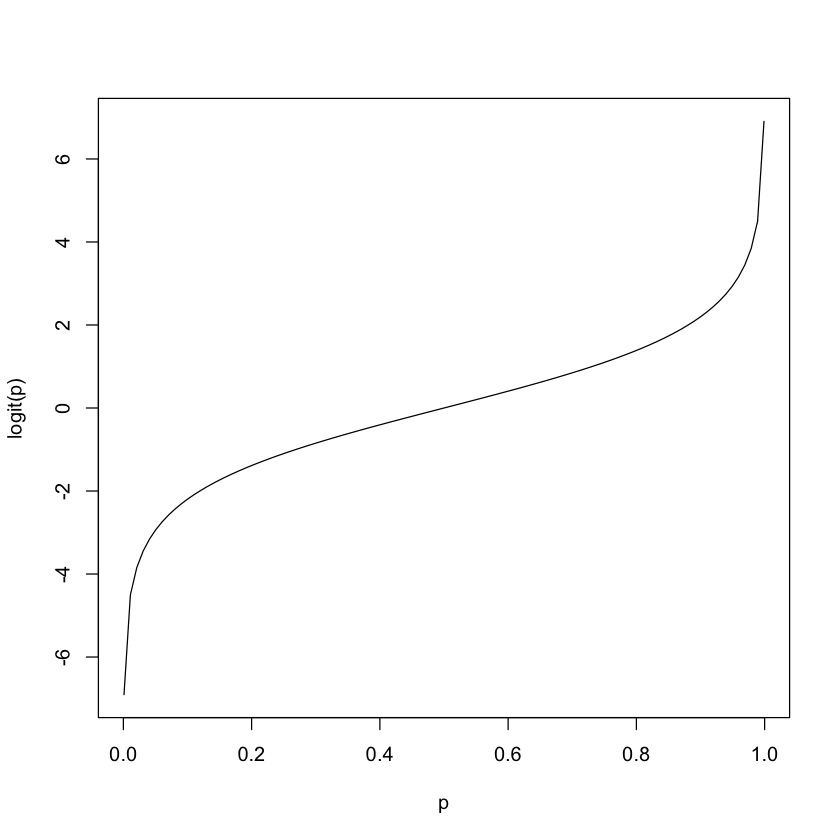

In [2]:
curve(linkfun, 0.001, 0.999, xlab="p", ylab="logit(p)")

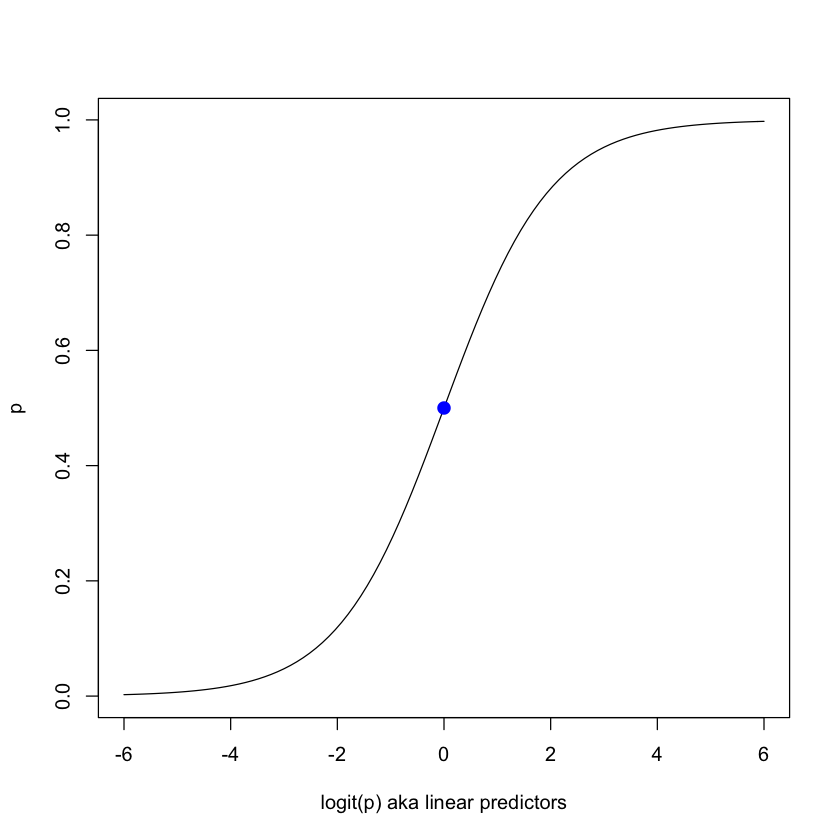

In [3]:
curve(linkinv, -6, 6, xlab="logit(p) aka linear predictors", ylab="p")
points(0, 0.5, col="blue", pch=16, cex=1.5)

上图曲线以蓝点为对称点。

#### 读入数据

Stata 12以下版本的数据可以使用read.dta函数读入。

In [4]:
library(foreign)
mroz <- read.dta("datasets//Mroz.dta")
head(mroz)

lfp,k5,k618,age,wc,hc,lwg,inc
yes,1,0,32,no,no,1.2101647,10.910
yes,0,2,30,no,no,0.3285041,19.500
yes,1,3,35,no,no,1.5141279,12.040
yes,0,3,34,no,no,0.0921151,6.800
yes,1,2,31,yes,no,1.5242802,20.100
yes,0,0,54,no,no,1.5564855,9.859


#### 在glm框架拟合logistic回归

In [5]:
m1 <- glm(lfp~k5+k618+age+wc+hc+lwg+inc,data=mroz,family=binomial)

In [6]:
summary(m1)


Call:
glm(formula = lfp ~ k5 + k618 + age + wc + hc + lwg + inc, family = binomial, 
    data = mroz)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.1062  -1.0900   0.5978   0.9709   2.1893  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept)  3.182140   0.644375   4.938 7.88e-07 ***
k5          -1.462913   0.197001  -7.426 1.12e-13 ***
k618        -0.064571   0.068001  -0.950 0.342337    
age         -0.062871   0.012783  -4.918 8.73e-07 ***
wcyes        0.807274   0.229980   3.510 0.000448 ***
hcyes        0.111734   0.206040   0.542 0.587618    
lwg          0.604693   0.150818   4.009 6.09e-05 ***
inc         -0.034446   0.008208  -4.196 2.71e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1029.75  on 752  degrees of freedom
Residual deviance:  905.27  on 745  degrees of freedom
AIC: 921.27

Number of Fisher Scoring iteratio

In [7]:
logLik(m1)

'log Lik.' -452.633 (df=8)

$Deviance = -2 logLik$

In [8]:
deviance(m1)

[1] 905.2659

In [9]:
exp(coef(m1)) ## Odds ratio

(Intercept)          k5        k618         age       wcyes       hcyes 
 24.0982799   0.2315607   0.9374698   0.9390650   2.2417880   1.1182149 
        lwg         inc 
  1.8306903   0.9661401

#### 对预测概率的可视化

In [10]:
m1 <- update(m1, x=TRUE)
head(m1$x)

,(Intercept),k5,k618,age,wcyes,hcyes,lwg,inc
1,1,1,0,32,0,0,1.2101647,10.910
2,1,0,2,30,0,0,0.3285041,19.500
3,1,1,3,35,0,0,1.5141279,12.040
4,1,0,3,34,0,0,0.0921151,6.800
5,1,1,2,31,1,0,1.5242802,20.100
6,1,0,0,54,0,0,1.5564855,9.859


In [11]:
m1 <- glm(lfp~k5+k618+age+wc+hc+lwg+inc,data=mroz,family=binomial, x=TRUE) ## 与上一行命令等价

In [12]:
colMeans(m1$x)

(Intercept)          k5        k618         age       wcyes       hcyes 
  1.0000000   0.2377158   1.3532537  42.5378486   0.2815405   0.3917663 
        lwg         inc 
  1.0971148  20.1289654

In [13]:
summary(mroz$age)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  30.00   36.00   43.00   42.54   49.00   60.00 

In [14]:
newdata= data.frame(k5=0.2377158, k618=1.3532537, age=30:60, wc= 'yes', hc= 'yes', lwg=1.0971148, inc=20.1289654 )
head(newdata, 3)
tail(newdata, 3)

k5,k618,age,wc,hc,lwg,inc
0.2377158,1.353254,30,yes,yes,1.097115,20.12897
0.2377158,1.353254,31,yes,yes,1.097115,20.12897
0.2377158,1.353254,32,yes,yes,1.097115,20.12897


,k5,k618,age,wc,hc,lwg,inc
29,0.2377158,1.353254,58,yes,yes,1.097115,20.12897
30,0.2377158,1.353254,59,yes,yes,1.097115,20.12897
31,0.2377158,1.353254,60,yes,yes,1.097115,20.12897


将type设置为"response"将返回预测概率，否则将得到线性组合（即$logit(p)$）的取值。

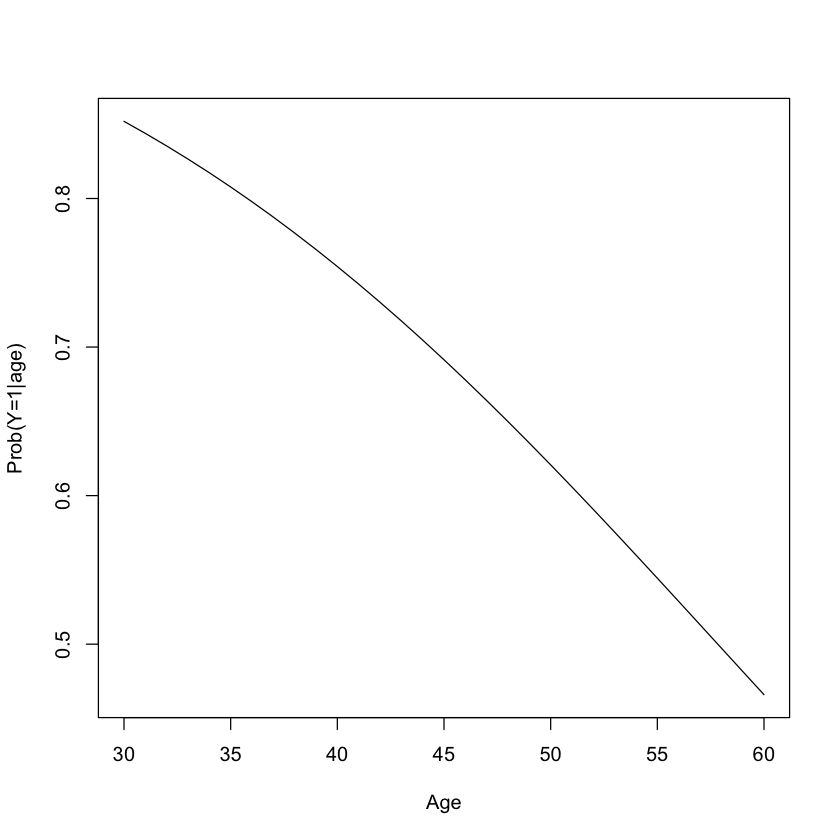

In [15]:
predProb = predict(m1, newdata, type="response")
plot(x=newdata$age, y=predProb, xlab="Age", ylab="Prob(Y=1|age)", type="l")

#### 直接汇报比数比(使用mfx程序包)

In [17]:
library(mfx)

Loading required package: sandwich
Loading required package: lmtest
Loading required package: zoo

Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric

Loading required package: MASS
Loading required package: betareg


In [18]:
logitor(lfp~k5+k618+age+wc+hc+lwg+inc, data=mroz)

Call:
logitor(formula = lfp ~ k5 + k618 + age + wc + hc + lwg + inc, 
    data = mroz)

Odds Ratio:
      OddsRatio Std. Err.       z     P>|z|    
k5    0.2315607 0.0456176 -7.4259 1.120e-13 ***
k618  0.9374698 0.0637487 -0.9496 0.3423372    
age   0.9390650 0.0120042 -4.9183 8.732e-07 ***
wcyes 2.2417880 0.5155662  3.5102 0.0004478 ***
hcyes 1.1182149 0.2303967  0.5423 0.5876178    
lwg   1.8306903 0.2761003  4.0094 6.086e-05 ***
inc   0.9661401 0.0079304 -4.1965 2.711e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

#### 均值对应的边缘效应

In [19]:
logitmfx(lfp~k5+k618+age+wc+hc+lwg+inc, data=mroz)

Call:
logitmfx(formula = lfp ~ k5 + k618 + age + wc + hc + lwg + inc, 
    data = mroz)

Marginal Effects:
           dF/dx  Std. Err.       z     P>|z|    
k5    -0.3568748  0.0482108 -7.4024 1.338e-13 ***
k618  -0.0157519  0.0165893 -0.9495 0.3423567    
age   -0.0153371  0.0031109 -4.9302 8.214e-07 ***
wcyes  0.1880592  0.0500262  3.7592 0.0001704 ***
hcyes  0.0271985  0.0500418  0.5435 0.5867752    
lwg    0.1475137  0.0367445  4.0146 5.955e-05 ***
inc   -0.0084031  0.0020046 -4.1919 2.766e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

dF/dx is for discrete change for the following variables:

[1] "wcyes" "hcyes"

#### 平均边缘效应

In [20]:
logitmfx(lfp~k5+k618+age+wc+hc+lwg+inc, data=mroz, atmean=FALSE)

Call:
logitmfx(formula = lfp ~ k5 + k618 + age + wc + hc + lwg + inc, 
    data = mroz, atmean = FALSE)

Marginal Effects:
           dF/dx  Std. Err.       z     P>|z|    
k5    -0.3036611  0.0474728 -6.3965 1.590e-10 ***
k618  -0.0134031  0.0141520 -0.9471 0.3435958    
age   -0.0130502  0.0028479 -4.5824 4.596e-06 ***
wcyes  0.1642247  0.0440574  3.7275 0.0001934 ***
hcyes  0.0231837  0.0427027  0.5429 0.5871923    
lwg    0.1255179  0.0328545  3.8204 0.0001332 ***
inc   -0.0071501  0.0017954 -3.9825 6.820e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

dF/dx is for discrete change for the following variables:

[1] "wcyes" "hcyes"

#### 单系数的统计检验

In [21]:
library(car)
Anova(m1, test.statistic= "Wald")

,Df,Chisq,Pr(>Chisq)
k5,1,55.1444617,1.119888e-13
k618,1,0.9016591,3.423372e-01
age,1,24.1892730,8.731727e-07
wc,1,12.3214549,4.477816e-04
hc,1,0.2940800,5.876178e-01
lwg,1,16.0755637,6.086437e-05
inc,1,17.6105920,2.710743e-05


In [22]:
Anova(m1, test.statistic= "LR")

,LR Chisq,Df,Pr(>Chisq)
k5,66.4841499,1,3.527184e-16
k618,0.9027615,1,3.420423e-01
age,25.5981378,1,4.204450e-07
wc,12.7237726,1,3.610367e-04
hc,0.2942827,1,5.874890e-01
lwg,17.0008610,1,3.736287e-05
inc,19.5042374,1,1.003768e-05


#### 线性假设检验(Wald test)

In [23]:
lht(m1, c("age=0", "inc=0"))

Res.Df,Df,Chisq,Pr(>Chisq)
747,NA,NA,NA
745,2,45.38643,1.394636e-10


In [24]:
lht(m1, "age-inc=0")

Res.Df,Df,Chisq,Pr(>Chisq)
746,NA,NA,NA
745,1,3.263753,0.07082686


#### 嵌套模型似然比检验

In [25]:
m1 <- glm(lfp~k5+k618+age+wc+hc+lwg+inc,data=mroz,family=binomial)
m2 <- glm(lfp~k5+k618+wc+hc,data=mroz,family=binomial)
#logLik(m1)
#logLik(m2)
anova(m2, m1, test="LRT")

Resid. Df,Resid. Dev,Df,Deviance,Pr(>Chi)
748,972.3907,NA,NA,NA
745,905.2659,3,67.1248,1.760953e-14


#### 通过分类表评估模型拟合度

In [26]:
predProb = predict(m1, type="response")
table(mroz$lfp, predProb>0.5)

     
      FALSE TRUE
  no    180  145
  yes    86  342

In [27]:
(180+342) / (180+145+86+342)

[1] 0.6932271

In [28]:
prop.table(table(mroz$lfp))


       no       yes 
0.4316069 0.5683931 

In [29]:
0.693227091633466 - 0.5683931 

[1] 0.124834

#### 模型拟合度：参见H&L 2nd ed

In [30]:
library(LogisticDx)
Sys.setlocale(, "C") ## need to set locale as "C" to avoid an encoding-related error

[1] "C/C/C/C/C/zh_CN.UTF-8"

n,y1hat,y1,y0hat,y0
1,0.01398749,0,0.98601251,1
1,0.96211981,1,0.03788019,0
1,0.95398401,1,0.04601599,0
1,0.94368293,1,0.05631707,0
1,0.04287774,0,0.95712226,1
1,0.94085331,1,0.05914669,0
1,0.93530674,1,0.06469326,0
1,0.92488014,1,0.07511986,0
1,0.03854676,0,0.96145324,1
1,0.92489163,1,0.07510837,0


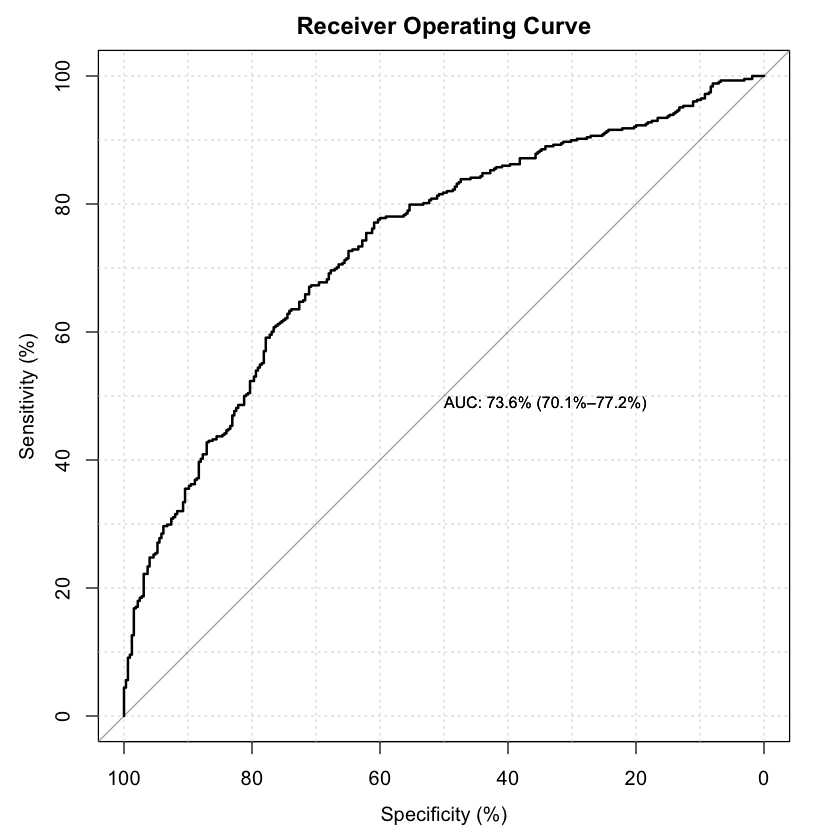

In [31]:
gof(m1)

在上述例子中，HL chiSq统计量显著，表明模型拟合度欠佳。

#### 逻辑斯蒂回归诊断：基于协变量模式的诊断（H&L, 2nd ed）

In [32]:
library(LogisticDx)
dx(m1)

(Intercept),k5,k618,age,wcyes,hcyes,lwg,inc,y,P,n,yhat,Pr,dr,h,sPr,sdr,dChisq,dDev,dBhat
1,3,1,31,1,1,0.9606535,73.599998,0,0.01398749,1,0.01398749,-0.1191046,-0.1678466,0.006021207,-0.1194648,-0.1683542,0.01427185,0.02834313,8.645432e-05
1,0,0,30,1,1,2.6831658,17.499996,1,0.96211981,1,0.96211981,0.1984228,0.2779075,0.005067038,0.1989274,0.2786143,0.03957210,0.07762591,2.015346e-04
1,0,0,30,1,1,2.3644607,17.799997,1,0.95398401,1,0.95398401,0.2196260,0.3069474,0.005288598,0.2202091,0.3077623,0.04849205,0.09471766,2.578184e-04
1,0,1,32,1,1,2.3271625,17.799992,1,0.94368293,1,0.94368293,0.2442907,0.3404851,0.004990548,0.2449026,0.3413379,0.05997728,0.11651156,3.008208e-04
1,1,3,51,0,0,0.2066842,44.987999,0,0.04287774,1,0.04287774,-0.2116568,-0.2960545,0.006640040,-0.2123630,-0.2970424,0.04509806,0.08823417,3.014546e-04
1,0,2,35,1,0,1.8289676,-0.029000,1,0.94085331,1,0.94085331,0.2507288,0.3491935,0.006199198,0.2515096,0.3502809,0.06325708,0.12269669,3.945893e-04
1,0,0,30,1,1,1.9278916,20.600000,1,0.93530674,1,0.93530674,0.2629980,0.3657342,0.006064777,0.2637992,0.3668483,0.06959000,0.13457765,4.246231e-04
1,0,2,32,1,1,1.5471342,11.179999,1,0.92488014,1,0.92488014,0.2849933,0.3951990,0.005217138,0.2857397,0.3962340,0.08164715,0.15700136,4.281984e-04
1,3,0,31,1,1,1.2959661,51.200001,0,0.03854676,1,0.03854676,-0.2002303,-0.2803903,0.011498520,-0.2013915,-0.2820163,0.04055855,0.07953321,4.717881e-04
1,0,0,35,1,1,1.6810741,11.799999,1,0.92489163,1,0.92489163,0.2849697,0.3951676,0.005743360,0.2857916,0.3963073,0.08167685,0.15705945,4.718093e-04


#### 函数形式设定

通过模拟来演示函数设定的过程。

In [33]:
## simulation
inc <- mroz$inc
lwg <- mroz$lwg
eta <- 0.8 - 0.55 * inc + 0.01 * I(inc^2) + 1.5 * lwg
p <- binomial()$linkinv(eta)
set.seed(20120413)
y <- rbinom(n=length(p), size=1, prob=p)
summary(m <- glm(y~inc+lwg,famil=binomial))


Call:
glm(formula = y ~ inc + lwg, family = binomial)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.9031  -0.4667  -0.3959  -0.3261   2.5941  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -3.866085   0.365906 -10.566  < 2e-16 ***
inc          0.037666   0.008436   4.465    8e-06 ***
lwg          0.644331   0.222132   2.901  0.00372 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 474.91  on 752  degrees of freedom
Residual deviance: 445.13  on 750  degrees of freedom
AIC: 451.13

Number of Fisher Scoring iterations: 5


偏残差图（也称为成分加残差图）有助于针对线性关系。如果图中的平滑线并不呈线性趋势，则可能存在着非线性关系。

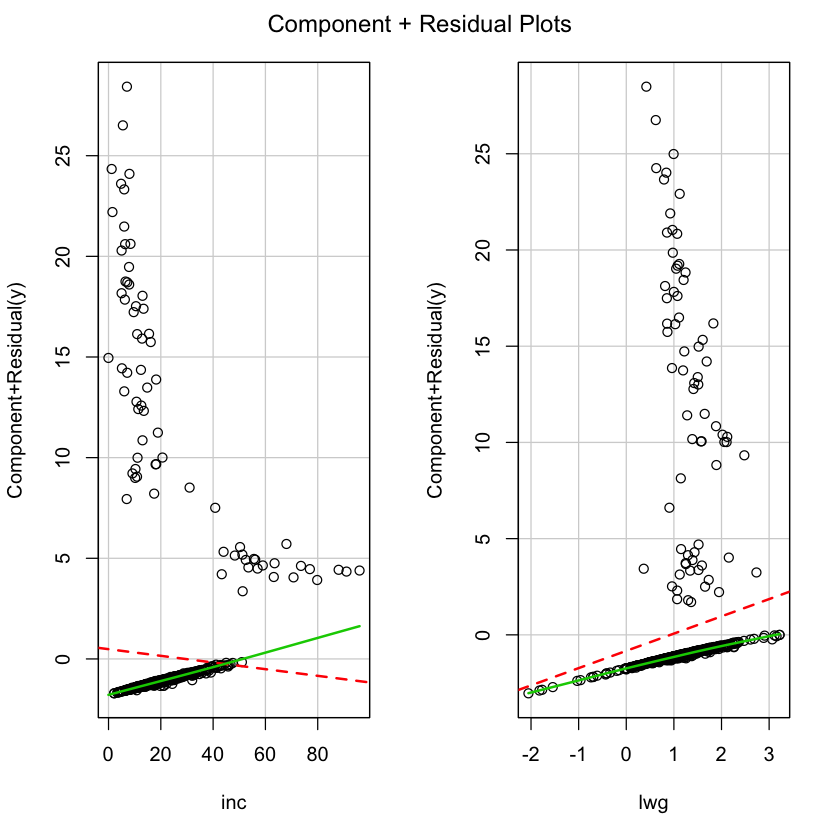

In [34]:
library(car)
crPlots(m)

左上图的平滑线呈现抛物线形状，意味着inc变量可能存在非线性关系，需要增加二次项，并且二次项的系数可能为正。

In [35]:
summary(m2 <- glm(y~inc + I(inc^2) + lwg, famil=binomial))

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


Call:
glm(formula = y ~ inc + I(inc^2) + lwg, family = binomial)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.5789  -0.3453  -0.2112  -0.1436   2.9712  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept)  0.657252   0.509191   1.291    0.197    
inc         -0.498131   0.056341  -8.841  < 2e-16 ***
I(inc^2)     0.009224   0.001056   8.731  < 2e-16 ***
lwg          1.326399   0.297656   4.456 8.34e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 474.91  on 752  degrees of freedom
Residual deviance: 296.47  on 749  degrees of freedom
AIC: 304.47

Number of Fisher Scoring iterations: 7


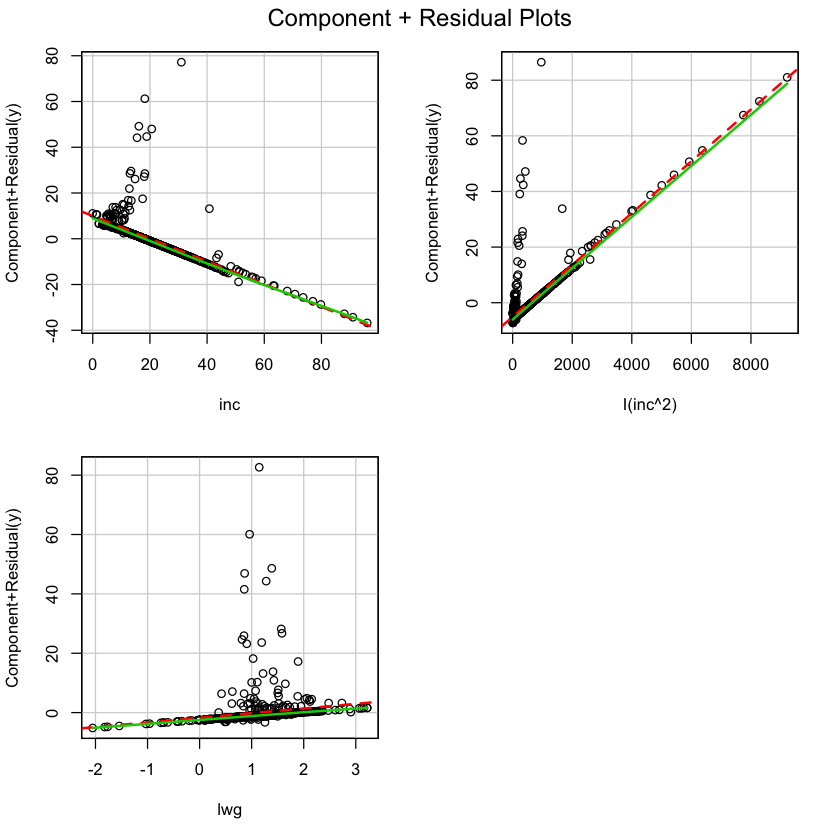

In [36]:
crPlots(m2)

三个图形中的平滑线均近似直线，因此模型设定可能没有问题。

#### 回归系数的可视化

回归系数的可视化在做论文宣讲的时候特别有用。

Warning message:
"Ignoring unknown aesthetics: xmin, xmax"

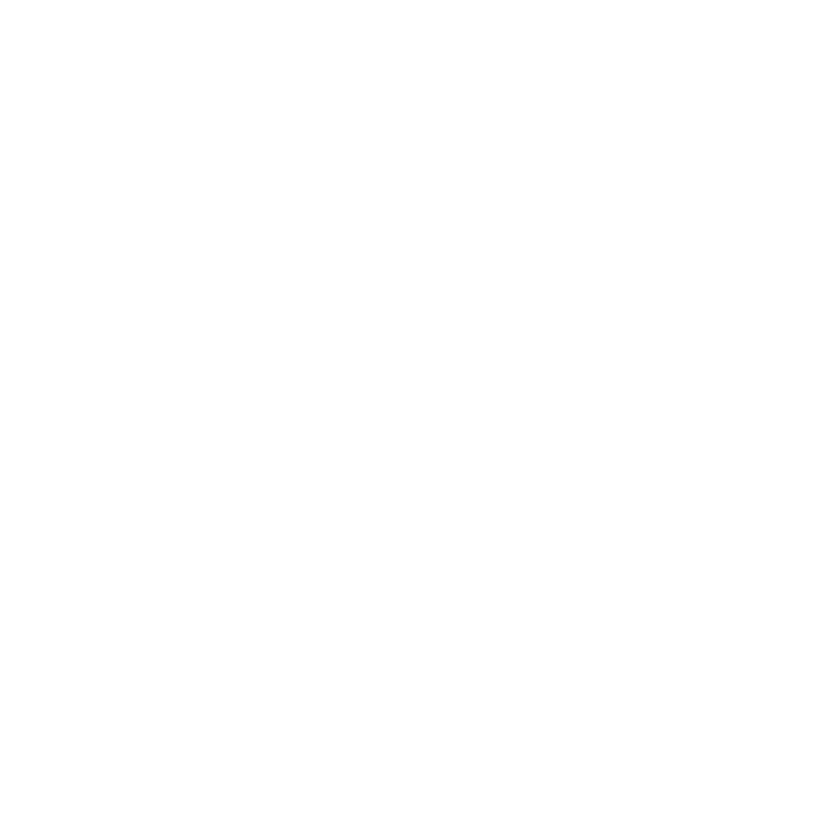

In [39]:
library(coefplot)
coefplot(m1)

### probit model in glm

In [38]:
mod_probit <- glm(lfp~k5+k618+age+wc+hc+lwg+inc,data=mroz, family=binomial(link="probit"))
summary(mod_probit)


Call:
glm(formula = lfp ~ k5 + k618 + age + wc + hc + lwg + inc, family = binomial(link = "probit"), 
    data = mroz)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.1359  -1.1024   0.5967   0.9746   2.2236  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept)  1.918418   0.382356   5.017 5.24e-07 ***
k5          -0.874712   0.114423  -7.645 2.10e-14 ***
k618        -0.038595   0.040950  -0.942 0.345942    
age         -0.037824   0.007605  -4.973 6.58e-07 ***
wcyes        0.488310   0.136731   3.571 0.000355 ***
hcyes        0.057172   0.124207   0.460 0.645306    
lwg          0.365635   0.089992   4.063 4.85e-05 ***
inc         -0.020525   0.004852  -4.230 2.34e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1029.75  on 752  degrees of freedom
Residual deviance:  905.39  on 745  degrees of freedom
AIC: 921.39

Number of Fisher